In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Transformers
==============

Unsupervised transformations for preprocessing
--------------------------------------------------

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [4]:
np.set_printoptions(suppress=True)
print(X_train)

[[   0.05789   12.5        6.07    ...,   18.9      396.21       8.1    ]
 [   0.57529    0.         6.2     ...,   17.4      385.91       2.47   ]
 [   0.10659   80.         1.91    ...,   22.       376.04       5.57   ]
 ..., 
 [   0.15086    0.        27.74    ...,   20.1      395.09      18.06   ]
 [   2.37857    0.        18.1     ...,   20.2      370.73      13.34   ]
 [   0.03445   82.5        2.03    ...,   14.7      393.77       7.43   ]]


In [5]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [   3.80672602   11.01187335   11.25155673    0.07124011    0.55485726
    6.2988496    69.25672823    3.7641562     9.51451187  408.78100264
   18.4707124   356.94290237   12.37021108] 
standard deviation : [   9.42881658   22.77509614    6.78621581    0.25722549    0.11552287
    0.72054257   28.37483511    2.07156489    8.66812165  166.64302155
    2.14780056   90.0910159     6.92819058] 


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_scaled = scaler.transform(X_train)

In [10]:
print(X_train.shape)
print(X_scaled.shape)

(379, 13)
(379, 13)


In [11]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [-0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.] 
standard deviation : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 


In [12]:
X_scaled_test = scaler.transform(X_test)

Principal Component Analysis
=============================

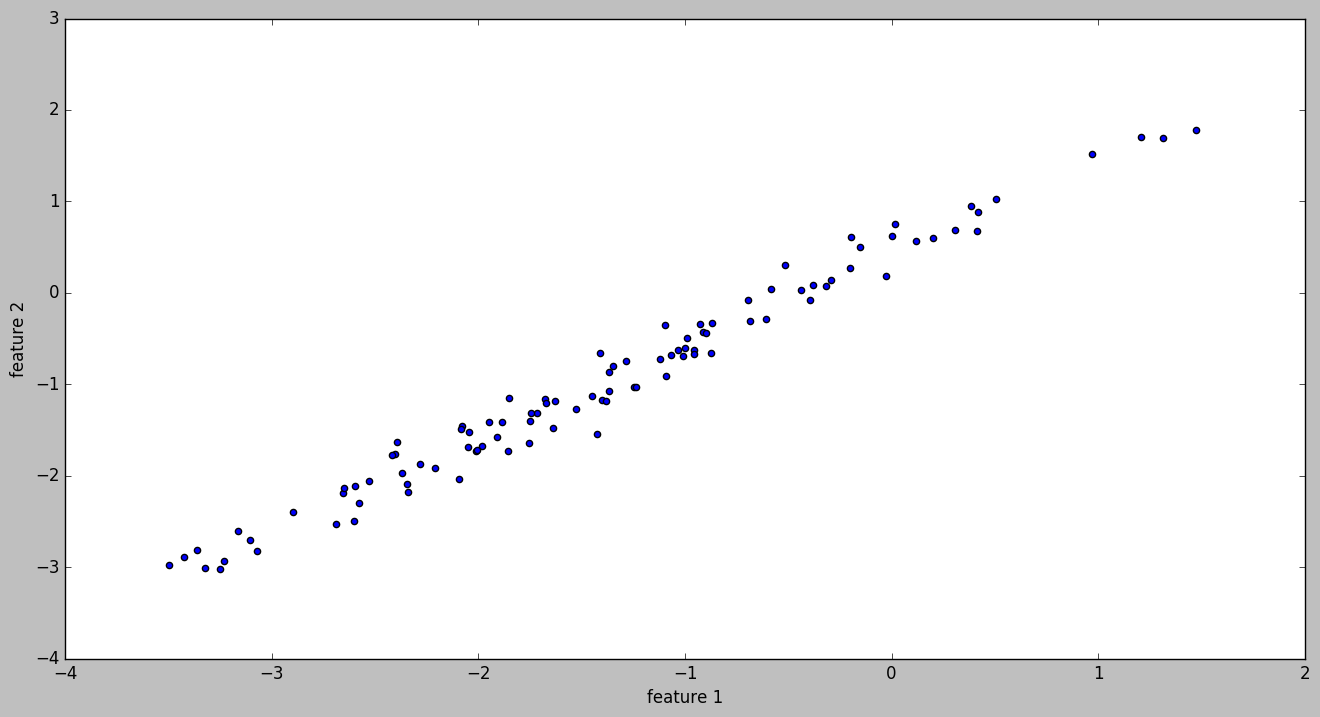

In [13]:
rnd = np.random.RandomState(42)
X_blob = np.dot(rnd.normal(size=(100, 2)), rnd.normal(size=(2, 2))) + rnd.normal(size=2)
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

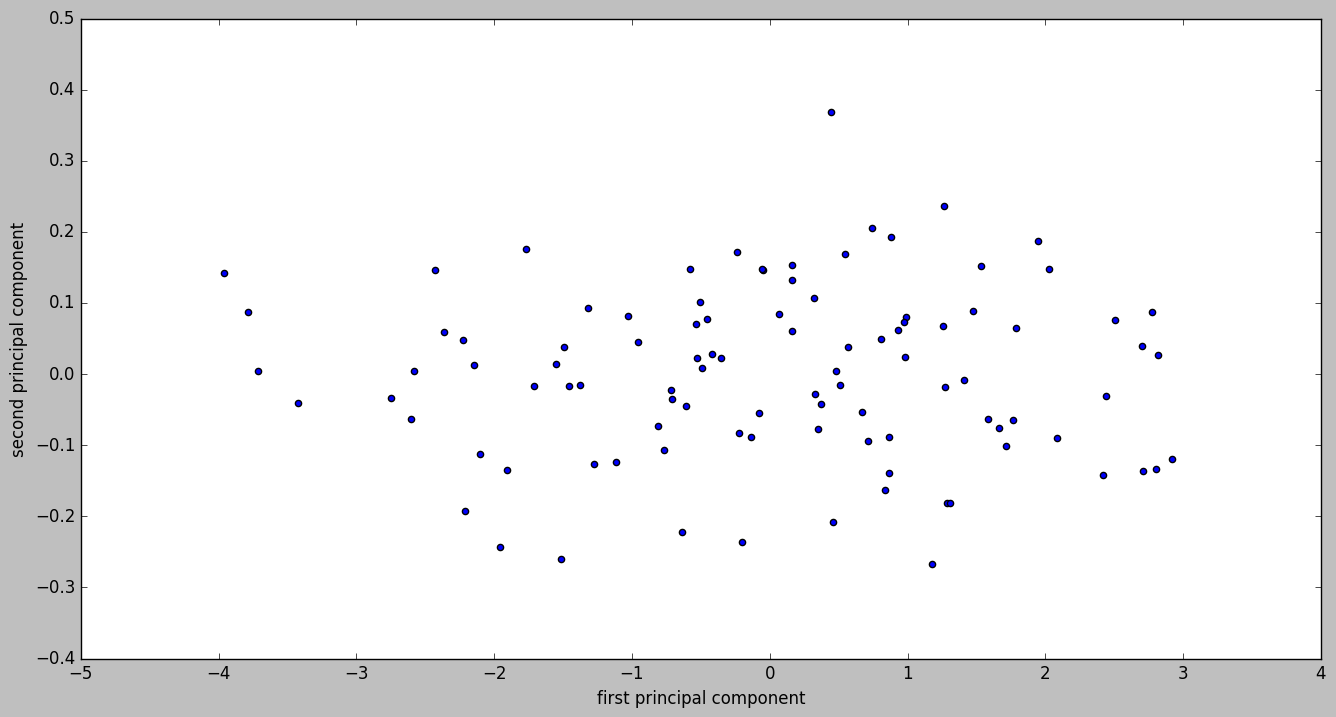

In [16]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

PCA for dimensionality Reduction
---------------------------------

In [17]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
X, y = digits.data, digits.target
print(X.shape)

(901, 64)


In [18]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [19]:
X_reduced = pca.transform(X)
print("Reduced dataset shape: %s" % (X_reduced.shape, ))

Reduced dataset shape: (901, 2)


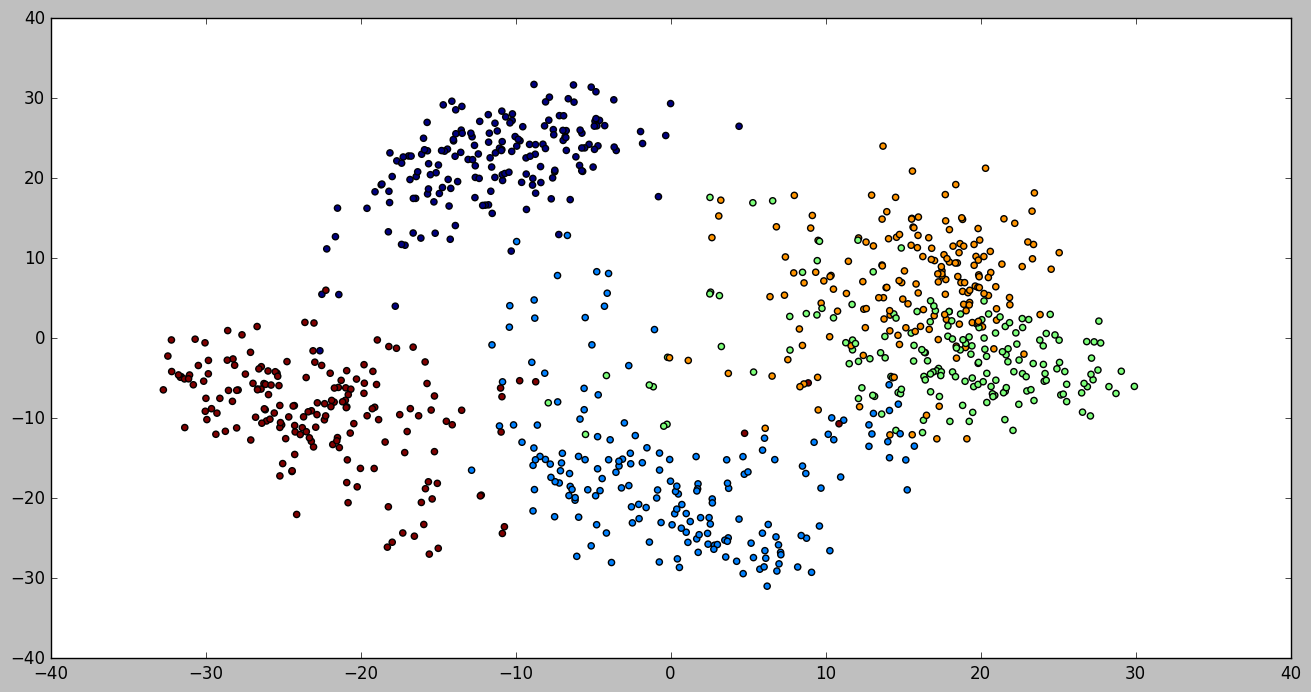

In [20]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)